## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import zipfile
# Computational libraries
import numpy as np
import pandas as pd


# Imporitng Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing Data Preparation and Modeling Libraries
from sklearn.model_selection import train_test_split,StratifiedKFold,RandomizedSearchCV,GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PowerTransformer
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.metrics import sensitivity_specificity_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Importing Sampling Library
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Miscellaneous Libraries
from collections import Counter
from numpy import argmax
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)

## Exploratory data analysis

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
train = df.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.shape)

(284807, 31)


In [4]:
# observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Let's check the numeric distribution of the data:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Good No Null Values!
df.isnull().sum().max()

0

Here we will observe the distribution of our classes

In [7]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

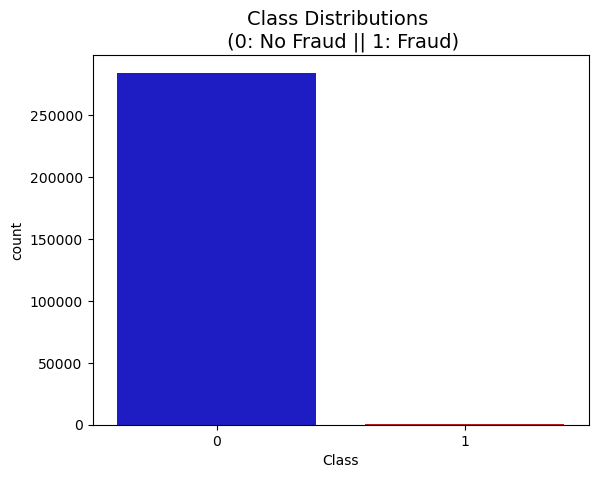

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [9]:
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


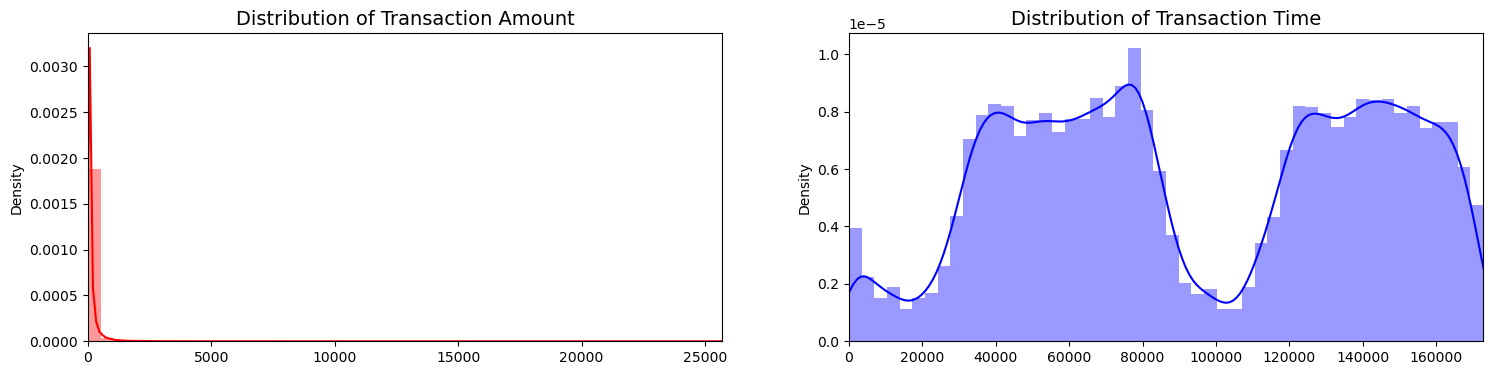

In [10]:
# Create a scatter plot to observe the distribution of classes with time
# import matplotlib.pyplot as plt
# plt.scatter(df['Time'], df['Class'])
# plt.show()

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [11]:
# Drop unnecessary columns
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [12]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783,-0.995,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,0
1,-0.270,-0.995,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,0
2,4.984,-0.995,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,0
3,1.418,-0.995,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,0
4,0.671,-0.995,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,0


### Splitting the data into train & test data

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


Train: [     0      1      2 ... 284804 284805 284806] Test: [     7      9     35 ... 284739 284770 284778]
Train: [     0      1      2 ... 284804 284805 284806] Test: [     5     10     16 ... 284772 284793 284799]
Train: [     0      3      4 ... 284804 284805 284806] Test: [     1      2     13 ... 284774 284776 284792]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    23     28     32 ... 284786 284797 284801]
Train: [     1      2      3 ... 284801 284803 284805] Test: [     0     12     20 ... 284802 284804 284806]
Train: [     0      1      2 ... 284803 284804 284806] Test: [     3      4      6 ... 284780 284781 284805]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    14     27     33 ... 284790 284795 284796]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    19     66     76 ... 284784 284788 284800]
Train: [     0      1      2 ... 284804 284805 284806] Test: [    11     15     22 ... 284765 284785 284789]
Train: [     0     

##### Preserve X_test & y_test to evaluate on the test data once you build the model

### Plotting the distribution of a variable

<Figure size 640x480 with 0 Axes>

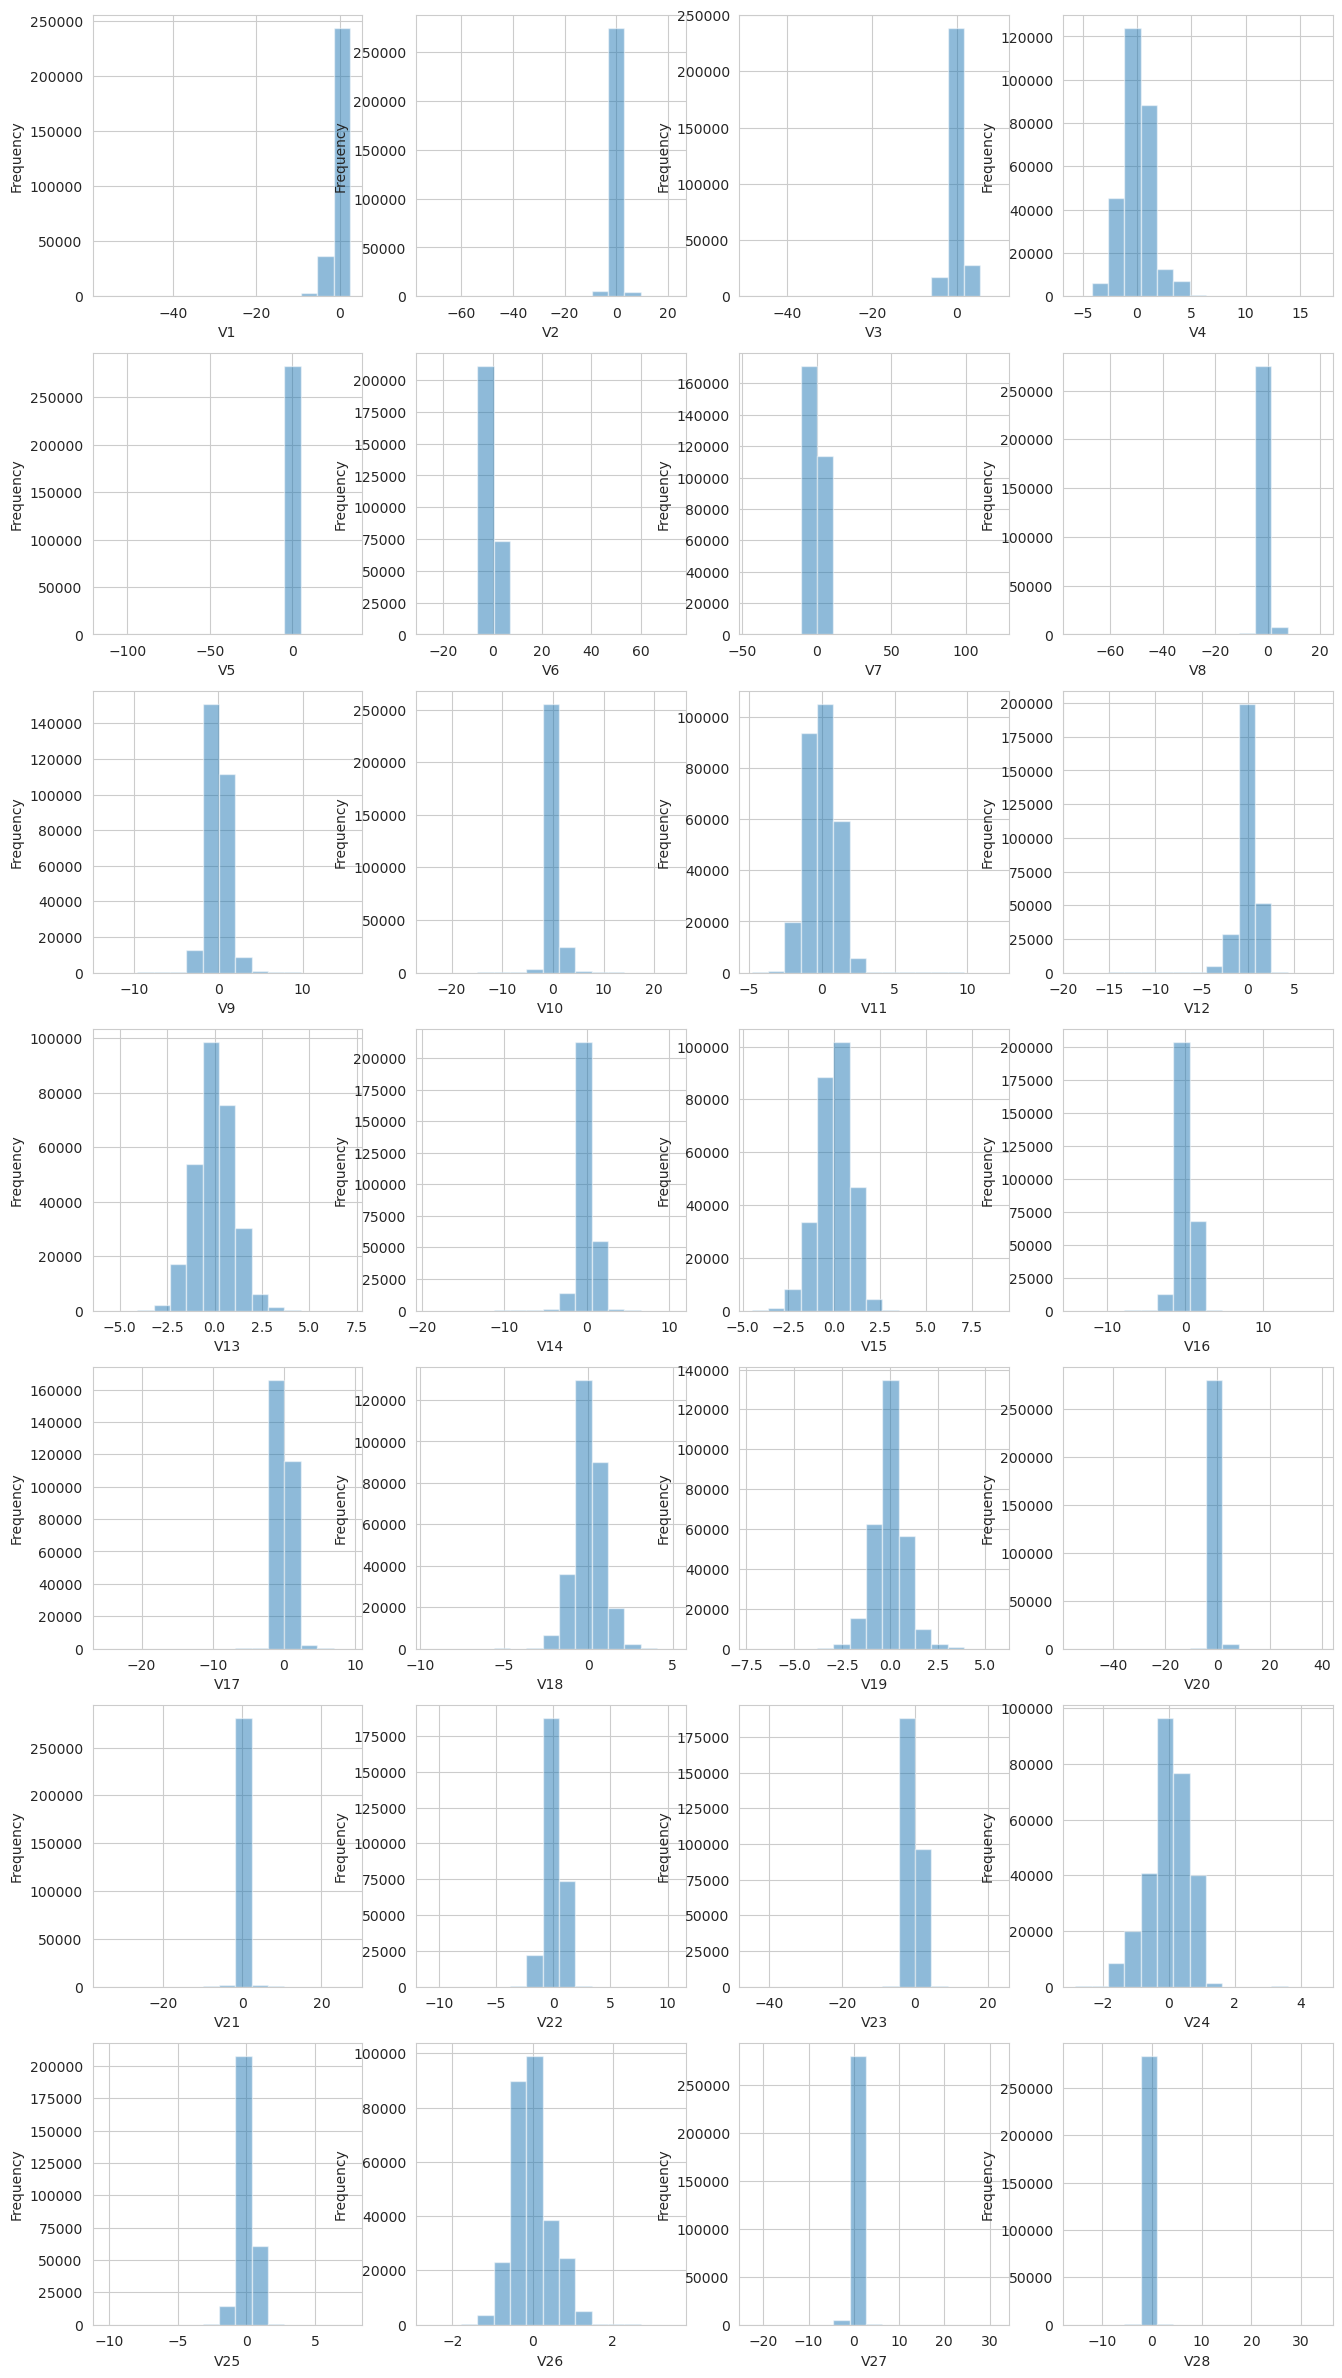

In [14]:
# plot the histogram of a variable from the dataset to see the skewness

#Features density plot
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28']

i = 0

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,30))

for feature in col:
    i += 1
    plt.subplot(7,4,i)
    df[feature].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
    plt.xlabel(feature, fontsize=10)

plt.show();


In [15]:
from scipy import stats
from scipy.stats import norm, skew 
skewed_feats = df[col].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
display(skewness)


Skew in numerical features: 



,Skew
V28,11.192
V21,3.593
V7,2.554
V6,1.827
V10,1.187
V4,0.676
V26,0.577
V9,0.555
V11,0.357
V19,0.109


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df[feat] = boxcox1p(df[feat], lam)

There are 28 skewed numerical features to Box Cox transform


<Figure size 640x480 with 0 Axes>

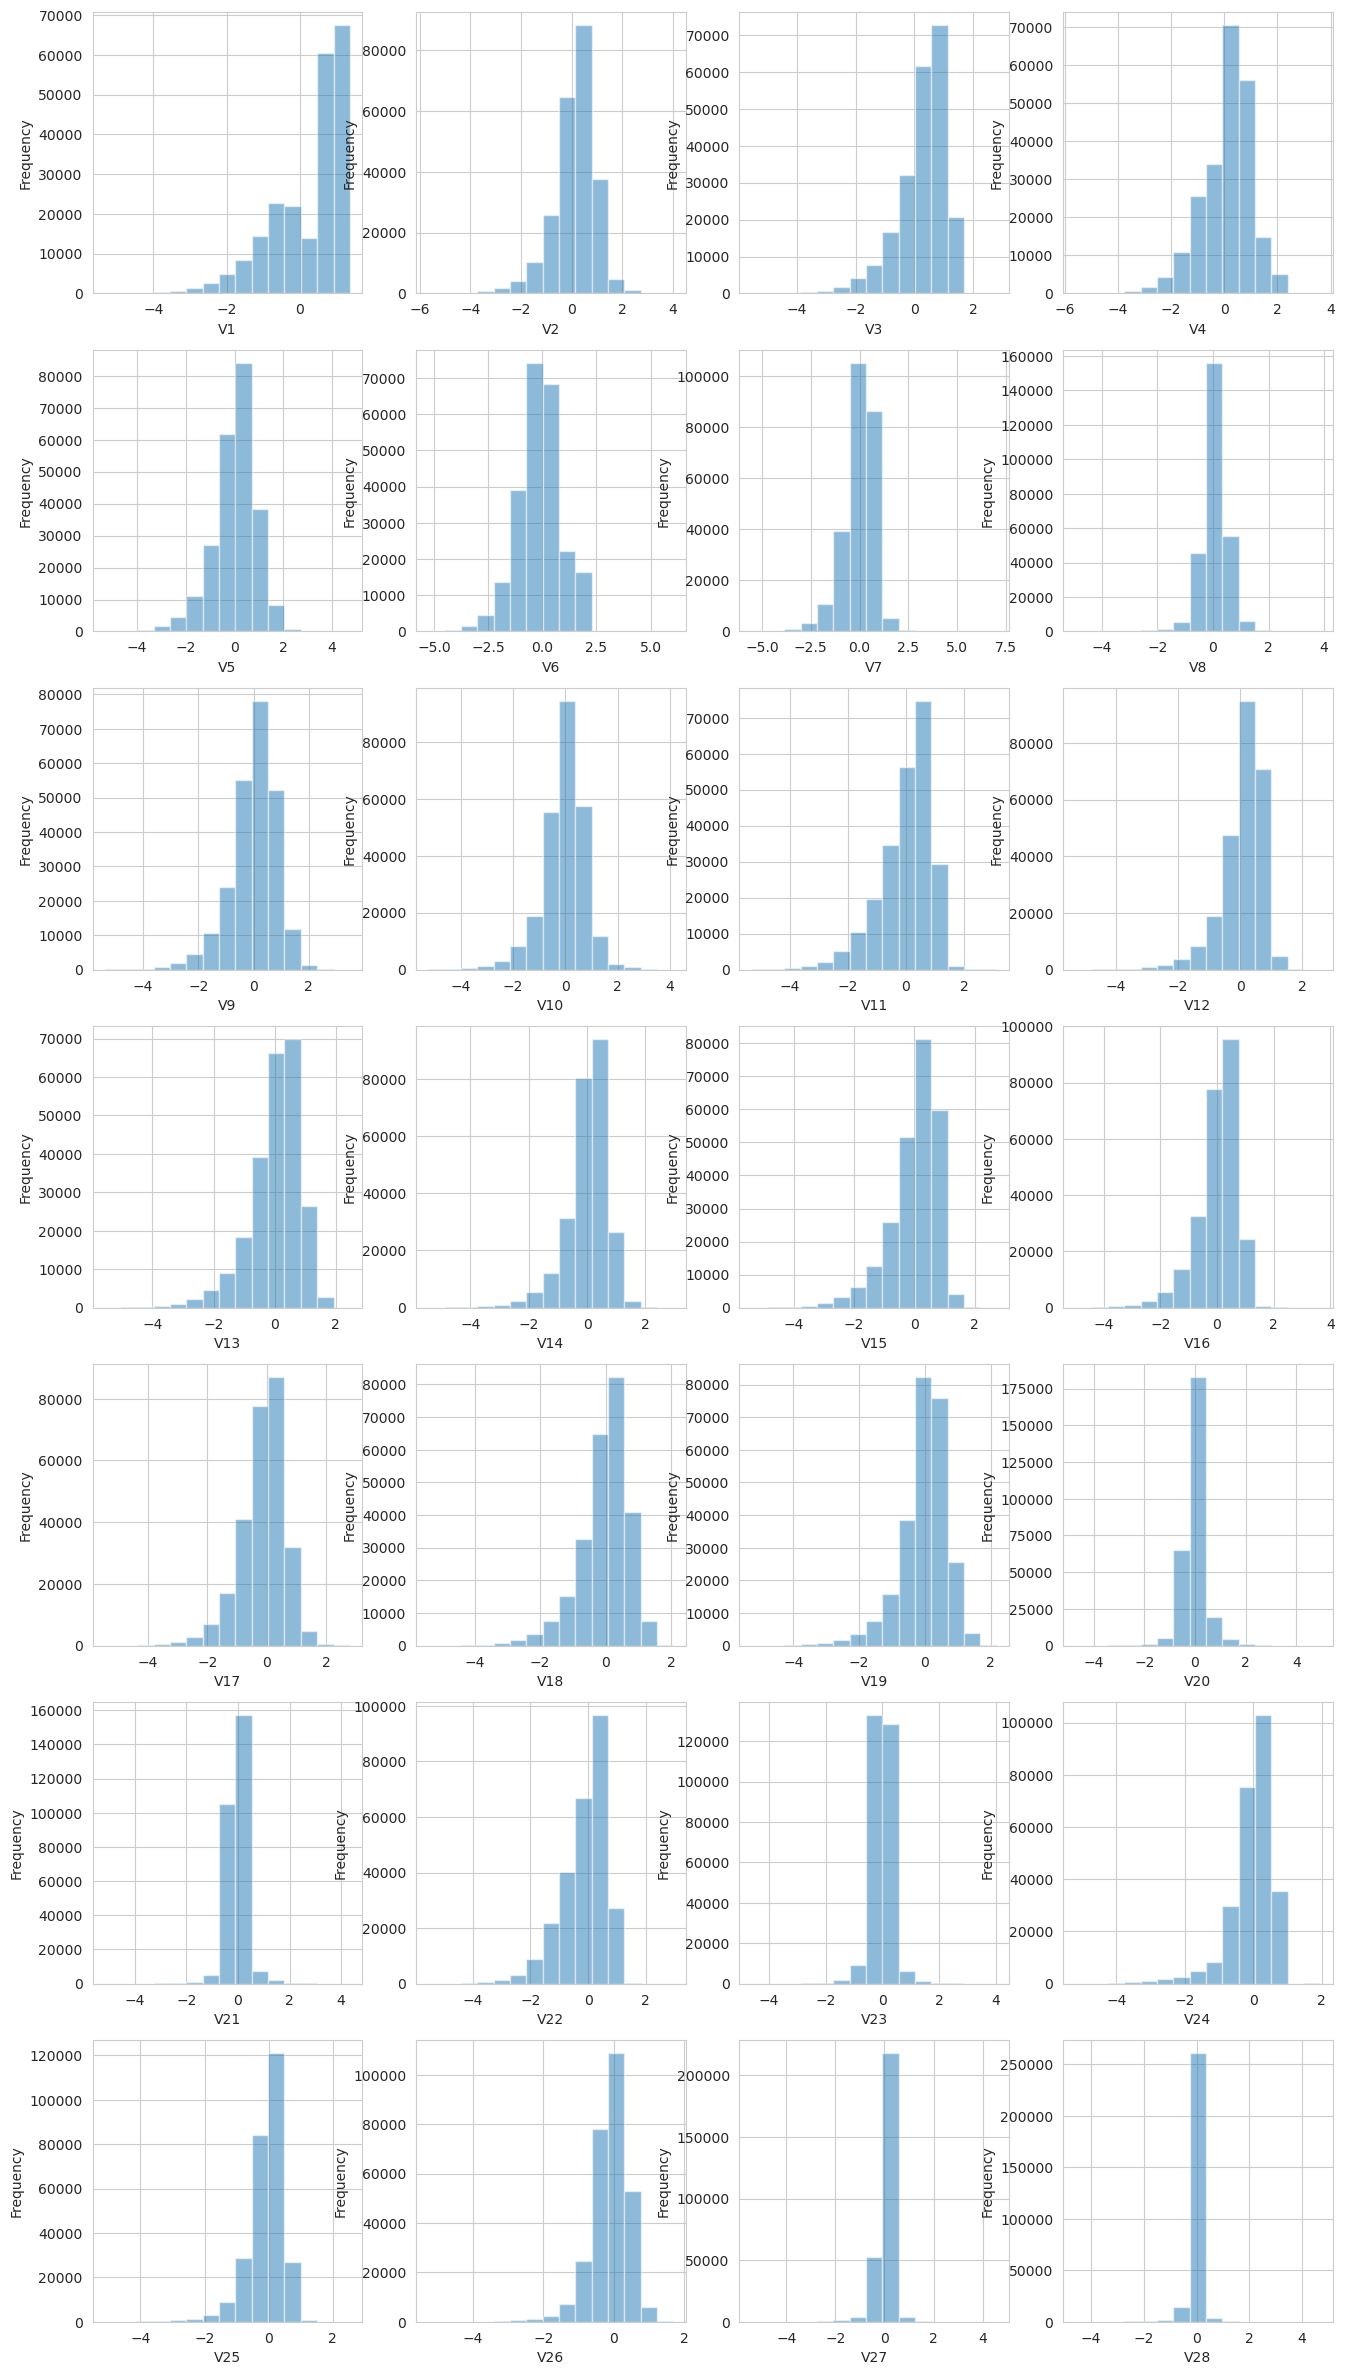

In [17]:
# plot the histogram of a variable from the dataset again to see the result 
# plot the histogram of a variable from the dataset to see the skewness

#Features density plot
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28']

i = 0

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(16,30))

for feature in col:
    i += 1
    plt.subplot(7,4,i)
    df[feature].plot.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
    plt.xlabel(feature, fontsize=10)

plt.show();

## Model Building
- Build different models on the imbalanced dataset and see the result

# Data Preparation 

In [18]:
#Dropping Time variable as we cannot infer anything from this
train.drop('Time',axis =1, inplace = True)

#splitting the target variable and independent variables
y = train.pop('Class')
X = train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify = y,random_state = 42)

In [19]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


## Scale data

In [20]:
sc = StandardScaler()
X_train['Amount'] = sc.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['Amount'] = sc.transform(X_test['Amount'].values.reshape(-1,1))
X_train.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,227845.000,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,227845.000,2.278e+05,2.278e+05,2.278e+05,227845.000,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05,2.278e+05
mean,7.953e-04,-4.810e-04,-3.830e-04,-1.972e-05,1.746e-04,-0.001,7.674e-05,-4.339e-04,7.018e-04,-3.894e-04,-7.872e-04,0.003,-4.931e-04,-5.862e-05,7.441e-04,-0.001,3.902e-04,5.624e-05,6.635e-04,-9.989e-04,3.697e-04,3.027e-04,5.039e-05,-2.773e-04,-6.554e-04,1.261e-04,-7.047e-05,1.537e-04,-2.021e-17
std,1.959e+00,1.649e+00,1.515e+00,1.416e+00,1.380e+00,1.331,1.238e+00,1.191e+00,1.097e+00,1.086e+00,1.019e+00,0.997,9.941e-01,9.560e-01,9.151e-01,0.874,8.442e-01,8.389e-01,8.139e-01,7.708e-01,7.350e-01,7.257e-01,6.274e-01,6.053e-01,5.212e-01,4.819e-01,4.049e-01,3.269e-01,1.000e+00
min,-5.641e+01,-7.272e+01,-4.833e+01,-5.683e+00,-1.137e+02,-26.161,-4.356e+01,-7.322e+01,-1.343e+01,-2.459e+01,-4.797e+00,-18.684,-5.792e+00,-1.921e+01,-4.499e+00,-14.130,-2.516e+01,-9.499e+00,-7.214e+00,-5.450e+01,-3.483e+01,-1.093e+01,-4.481e+01,-2.837e+00,-1.030e+01,-2.605e+00,-2.257e+01,-1.543e+01,-3.517e-01
25%,-9.199e-01,-5.988e-01,-8.918e-01,-8.471e-01,-6.921e-01,-0.769,-5.535e-01,-2.078e-01,-6.403e-01,-5.357e-01,-7.618e-01,-0.402,-6.486e-01,-4.258e-01,-5.826e-01,-0.469,-4.834e-01,-4.991e-01,-4.550e-01,-2.117e-01,-2.282e-01,-5.421e-01,-1.619e-01,-3.548e-01,-3.169e-01,-3.265e-01,-7.074e-02,-5.293e-02,-3.292e-01
50%,1.869e-02,6.475e-02,1.799e-01,-2.136e-02,-5.476e-02,-0.274,4.042e-02,2.322e-02,-5.065e-02,-9.333e-02,-3.142e-02,0.142,-1.435e-02,4.957e-02,4.840e-02,0.065,-6.555e-02,-3.484e-03,5.351e-03,-6.261e-02,-2.928e-02,6.599e-03,-1.098e-02,4.078e-02,1.608e-02,-5.162e-02,1.463e-03,1.122e-02,-2.639e-01
75%,1.316e+00,8.039e-01,1.026e+00,7.423e-01,6.113e-01,0.398,5.705e-01,3.278e-01,5.983e-01,4.545e-01,7.375e-01,0.620,6.619e-01,4.921e-01,6.495e-01,0.522,4.001e-01,5.004e-01,4.598e-01,1.327e-01,1.864e-01,5.283e-01,1.476e-01,4.390e-01,3.499e-01,2.408e-01,9.118e-02,7.812e-02,-4.262e-02
max,2.452e+00,2.206e+01,9.383e+00,1.688e+01,3.480e+01,73.302,1.206e+02,2.001e+01,1.559e+01,2.375e+01,1.202e+01,7.848,7.127e+00,1.053e+01,8.878e+00,17.315,9.254e+00,5.041e+00,5.572e+00,3.942e+01,2.720e+01,1.050e+01,2.253e+01,4.585e+00,6.071e+00,3.517e+00,3.161e+01,3.385e+01,1.021e+02


# ## Model building - Balanced Dataset

# 1) BALANCING TECHNIQUE 1 : UNIFORM OVERSAMPLING

# LOGISTIC REGRESSION

In [21]:
logistic = LogisticRegression(random_state = 42, class_weight = 'balanced')

# create pipeline
steps = [("pt", PowerTransformer(copy = False)),
         ("logistic", logistic)
        ]

# compile pipeline
logis = Pipeline(steps)


# Logistic Regression 
params = {"logistic__penalty": ['l1', 'l2'], 'logistic__C': [0.006,0.007], 
          "logistic__solver" : ['sag', 'saga']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

grid_log_reg = RandomizedSearchCV(estimator=logis, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
grid_log_reg.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Pipeline(steps=[('pt', PowerTransformer(copy=False)),
                ('logistic',
                 LogisticRegression(C=0.006, class_weight='balanced',
                                    random_state=42, solver='saga'))])

In [22]:
# print best hyperparameters
print("Best Roc_AUC: ", grid_log_reg.best_score_)
print("Best hyperparameters: ", grid_log_reg.best_params_)

Best Roc_AUC:  0.981927940387818
Best hyperparameters:  {'logistic__solver': 'saga', 'logistic__penalty': 'l2', 'logistic__C': 0.006}


Best Threshold=0.513292


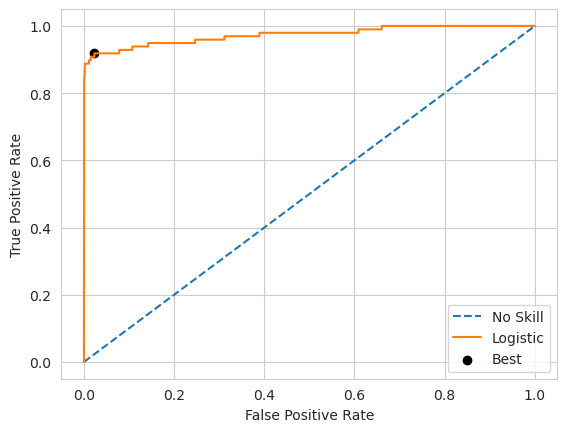

In [23]:
# predict probabilities
y_pred_prob = grid_log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [24]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)

uni_oversamp = pd.DataFrame([['Logistic Regression',round(sensitivity,4), round(specificity,4),round(grid_log_reg.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
uni_oversamp

[[55543  1321]
 [    9    89]]
Sensitivity: 	0.908
Specificity: 	0.977


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.908,0.977,0.982,0.943


## DECISION TREE

In [25]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('dtree', DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [6,7],"dtree__min_samples_split": [70,72],
          "dtree__min_samples_leaf": [23,24]}



# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
dtree_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1, random_state = 42)
# Fit the grid search to the data
dtree_grid.fit(X_train,y_train)
# We automatically get the logistic regression with the best parameters.
dtree_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('pt', PowerTransformer()),
                ('dtree',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=6,
                                        min_samples_leaf=23,
                                        min_samples_split=70,
                                        random_state=42))])

In [26]:
# print best hyperparameters
print("Best Recall: ", dtree_grid.best_score_)
print("Best hyperparameters: ", dtree_grid.best_params_)

Best Recall:  0.9240969501487222
Best hyperparameters:  {'dtree__min_samples_split': 70, 'dtree__min_samples_leaf': 23, 'dtree__max_depth': 6, 'dtree__criterion': 'entropy'}


Best Threshold=0.907858


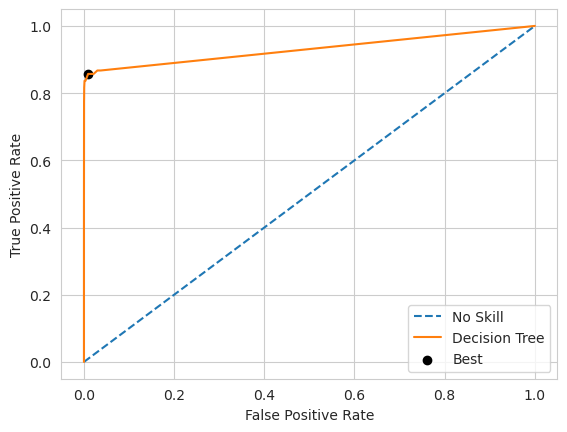

In [27]:
# predict probabilities
y_pred_prob = dtree_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [28]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Decision Tree',round(sensitivity,4), round(specificity,4),round(dtree_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])

uni_oversamp = uni_oversamp.append(model_results, ignore_index = True)
uni_oversamp

[[56670   194]
 [   16    82]]
Sensitivity: 	0.84
Specificity: 	1.0


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.908,0.977,0.982,0.943
1,Decision Tree,0.837,0.997,0.924,0.917


## RANDOM FOREST

In [29]:
from sklearn.model_selection import RandomizedSearchCV
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('rf', RandomForestClassifier(random_state=42, class_weight = 'balanced',
                                                                          warm_start = True))])

# hyperparameter space
params = {"rf__criterion": ['gini', 'entropy'],"rf__n_estimators": [100,110],
         "rf__min_samples_leaf": [8,10]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create Randomsearch object
rf_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,
                             random_state=42)
# Fit the grid search to the data
rf_grid.fit(X_train,y_train)
# We automatically get the logistic regression with the best parameters.
rf_grid.best_estimator_

# print best hyperparameters
print("Best Recall: ", rf_grid.best_score_)
print("Best hyperparameters: ", rf_grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Recall:  0.9710655768406466
Best hyperparameters:  {'rf__n_estimators': 100, 'rf__min_samples_leaf': 10, 'rf__criterion': 'entropy'}


Best Threshold=0.049319


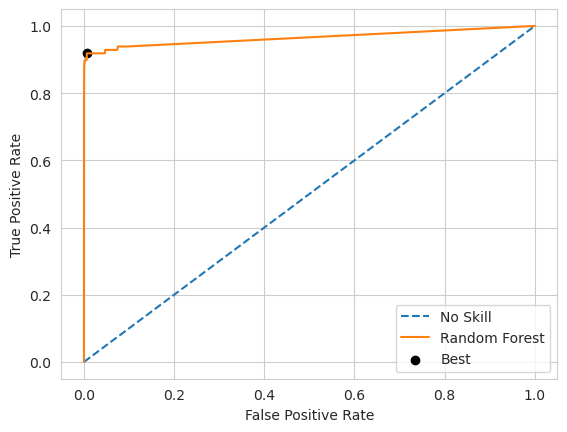

In [30]:
# predict probabilities
y_pred_prob = rf_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [31]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Random Forest',round(sensitivity,4), round(specificity,4),round(rf_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
uni_oversamp = uni_oversamp.append(model_results, ignore_index = True)
uni_oversamp

[[56507   357]
 [    9    89]]
Sensitivity: 	0.91
Specificity: 	0.99


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.908,0.977,0.982,0.943
1,Decision Tree,0.837,0.997,0.924,0.917
2,Random Forest,0.908,0.994,0.971,0.951


## XGBOOST

In [32]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), 
                 ('xgb', XGBClassifier(n_estimators=120, 
                                       objective='binary:logistic', warm_start = True, class_weight='balanced'))])

params = {
        "xgb__gamma": [0.06,0.07],
        "xgb__max_depth": [7,8],
        "xgb__learning_rate": [0.1,0.2],
        }
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

xgb_random = RandomizedSearchCV(estimator = pipe, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, 
                                random_state=42)
# fitting the model
xgb_random.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
xgb_random.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[05:08:40] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('pt', PowerTransformer()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               class_weight='balanced', colsample_bylevel=1,
                               colsample_bynode=1, colsample_bytree=1,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0.06, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=7, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=120, n_jobs=0, num_parallel_tree=1,
                               predictor='auto'

In [33]:
# print best hyperparameters
print("Best Recall: ", xgb_random.best_score_)
print("Best hyperparameters: ", xgb_random.best_params_)

Best Recall:  0.9811895723601346
Best hyperparameters:  {'xgb__max_depth': 7, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0.06}


Best Threshold=0.001520


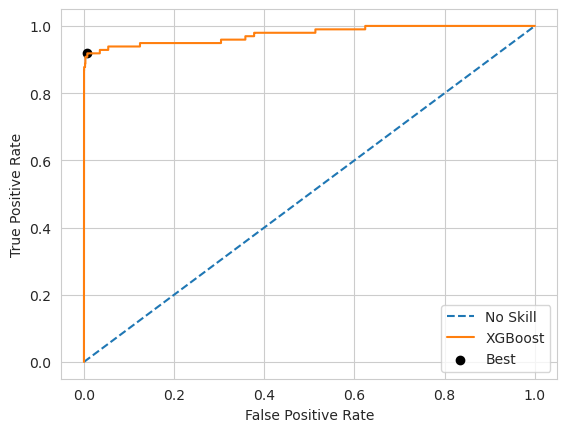

In [34]:
# predict probabilities
y_pred_prob = xgb_random.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [35]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['XGBoost',round(sensitivity,4), round(specificity,4),round(xgb_random.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
uni_oversamp = uni_oversamp.append(model_results, ignore_index = True)
uni_oversamp

[[56442   422]
 [    9    89]]
Sensitivity: 	0.91
Specificity: 	0.99


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.908,0.977,0.982,0.943
1,Decision Tree,0.837,0.997,0.924,0.917
2,Random Forest,0.908,0.994,0.971,0.951
3,XGBoost,0.908,0.993,0.981,0.950


## 2) BALANCING TECHNIQUE 2 : RANDOM OVERSAMPLING

In [36]:
print('Original dataset shape: ')
print(y_train.value_counts())
print('\n')

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape: ')
print(y_ros.value_counts())

Original dataset shape: 
0    227451
1       394
Name: Class, dtype: int64


Resampled dataset shape: 
0    227451
1    227451
Name: Class, dtype: int64


In [37]:
print('Original dataset shape: ')
pd.crosstab(y_train, columns='count')

Original dataset shape: 


col_0,count
Class,
0,227451
1,394


In [38]:
print('Resampled dataset shape: ')
#Checking the class (percentage) distribution of the target after Random oversampling
pd.crosstab(y_ros, columns='count')

Resampled dataset shape: 


col_0,count
Class,
0,227451
1,227451


## LOGISTIC REGRESSION

In [39]:
logistic = LogisticRegression(random_state = 42)

# create pipeline
steps = [("pt", PowerTransformer(copy = False)),
         ("logistic", logistic)
        ]

# compile pipeline
logis = Pipeline(steps)


# Logistic Regression 
params = {"logistic__penalty": ['l1', 'l2'], 'logistic__C': [0.006,0.007], 
          "logistic__solver" : ['sag', 'saga']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

grid_log_reg = RandomizedSearchCV(estimator=logis, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)
grid_log_reg.fit(X_ros, y_ros)
# We automatically get the logistic regression with the best parameters.
grid_log_reg.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Pipeline(steps=[('pt', PowerTransformer(copy=False)),
                ('logistic',
                 LogisticRegression(C=0.007, random_state=42, solver='sag'))])

In [40]:
# print best hyperparameters
print("Best ROC_AUC: ", grid_log_reg.best_score_)
print("Best hyperparameters: ", grid_log_reg.best_params_)

Best ROC_AUC:  0.9866807999388187
Best hyperparameters:  {'logistic__solver': 'sag', 'logistic__penalty': 'l2', 'logistic__C': 0.007}


Best Threshold=0.551227


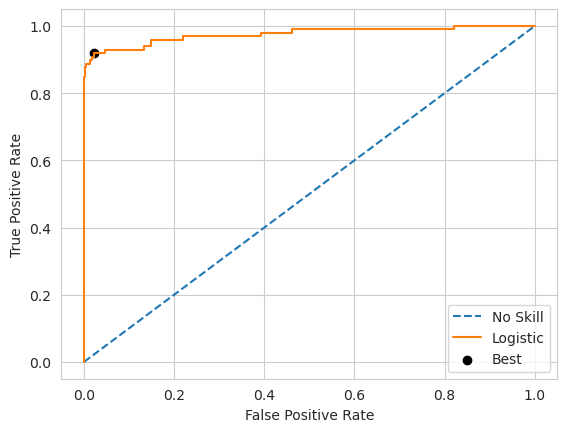

In [41]:
# predict probabilities
y_pred_prob = grid_log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [42]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 3), "\n", "Specificity: \t", round(specificity, 3), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)

rand_oversamp = pd.DataFrame([['Logistic Regression',round(sensitivity,4), round(specificity,4),round(grid_log_reg.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
rand_oversamp

[[55564  1300]
 [    9    89]]
Sensitivity: 	0.908
Specificity: 	0.977


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.908,0.977,0.987,0.943


## DECISION TREE

In [43]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [3,4],"dtree__min_samples_split": [15,20],
          "dtree__min_samples_leaf": [3000,3500]}



# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
dtree_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)
# Fit the grid search to the data
dtree_grid.fit(X_ros, y_ros)
# We automatically get the logistic regression with the best parameters.
dtree_grid.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('pt', PowerTransformer()),
                ('dtree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=3000,
                                        min_samples_split=20,
                                        random_state=42))])

In [44]:
# print best hyperparameters
print("Best ROC_AUC: ", dtree_grid.best_score_)
print("Best hyperparameters: ", dtree_grid.best_params_)

Best ROC_AUC:  0.9878698025491947
Best hyperparameters:  {'dtree__min_samples_split': 20, 'dtree__min_samples_leaf': 3000, 'dtree__max_depth': 4, 'dtree__criterion': 'entropy'}


Best Threshold=0.801190


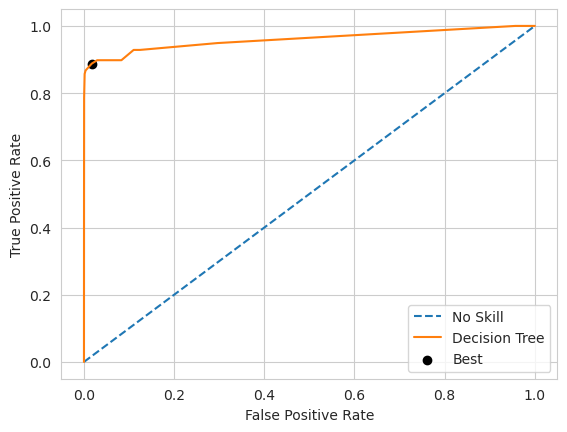

In [45]:
# predict probabilities
y_pred_prob = dtree_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Tree')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [46]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Decision Tree',round(sensitivity,4), round(specificity,4),round( dtree_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score', 'Test AUC Score'])

rand_oversamp = rand_oversamp.append(model_results, ignore_index = True)
rand_oversamp

[[56660   204]
 [   13    85]]
Sensitivity: 	0.87
Specificity: 	1.0


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.908,0.977,0.987,0.943
1,Decision Tree,0.867,0.996,0.988,0.932


## RANDOM FOREST

In [47]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('rf', RandomForestClassifier(random_state=42,
                                                                          warm_start = True))])

# hyperparameter space
params = {"rf__criterion": ['gini', 'entropy'],"rf__n_estimators": [20,30],
         "rf__min_samples_leaf": [500,550]}

# create 5 folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

# create gridsearch object
rf_grid = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,
                             random_state=42 )
# Fit the grid search to the data
rf_grid.fit(X_ros, y_ros)
# We automatically get the logistic regression with the best parameters.
rf_grid.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Pipeline(steps=[('pt', PowerTransformer()),
                ('rf',
                 RandomForestClassifier(criterion='entropy',
                                        min_samples_leaf=500, n_estimators=30,
                                        random_state=42, warm_start=True))])

In [48]:
# print best hyperparameters
print("Best ROC_AUC: ", rf_grid.best_score_)
print("Best hyperparameters: ", rf_grid.best_params_)

Best ROC_AUC:  0.9998800566144225
Best hyperparameters:  {'rf__n_estimators': 30, 'rf__min_samples_leaf': 500, 'rf__criterion': 'entropy'}


Best Threshold=0.262478


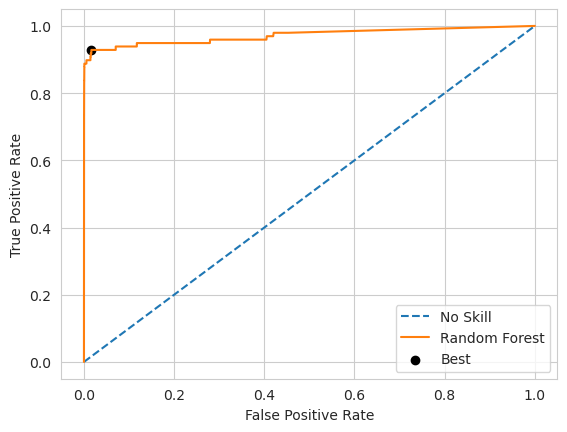

In [49]:
# predict probabilities
y_pred_prob = rf_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [50]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['Random Forest',round(sensitivity,4),round(specificity,4),round(rf_grid.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score','Test AUC Score'])
rand_oversamp = rand_oversamp.append(model_results, ignore_index = True)
rand_oversamp

[[55929   935]
 [    8    90]]
Sensitivity: 	0.92
Specificity: 	0.98


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.908,0.977,0.987,0.943
1,Decision Tree,0.867,0.996,0.988,0.932
2,Random Forest,0.918,0.984,1.000,0.951


## XGBOOST

In [51]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), 
                 ('xgb', XGBClassifier(n_estimators=120, 
                                       objective='binary:logistic', warm_start = True))])


params = {
        "xgb__gamma": [0.07,0.08],
        "xgb__max_depth": [8,9],
        "xgb__learning_rate": [0.2,0.3],
        }
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

xgb_random = RandomizedSearchCV(estimator = pipe, param_distributions=params, scoring='roc_auc', n_jobs=-1, cv=folds, verbose=1, random_state=42 )

# Fitting the model

xgb_random.fit(X_ros, y_ros)
# We automatically get the logistic regression with the best parameters.
xgb_random.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[06:53:46] WARNING: ../src/learner.cc:627: 
Parameters: { "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




Pipeline(steps=[('pt', PowerTransformer()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0.08, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.3, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=8, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=120, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                         

In [52]:
# print best hyperparameters
print("Best ROC_AUC: ", xgb_random.best_score_)
print("Best hyperparameters: ", xgb_random.best_params_)

Best ROC_AUC:  0.9999897584475562
Best hyperparameters:  {'xgb__max_depth': 8, 'xgb__learning_rate': 0.3, 'xgb__gamma': 0.08}


Best Threshold=0.000088


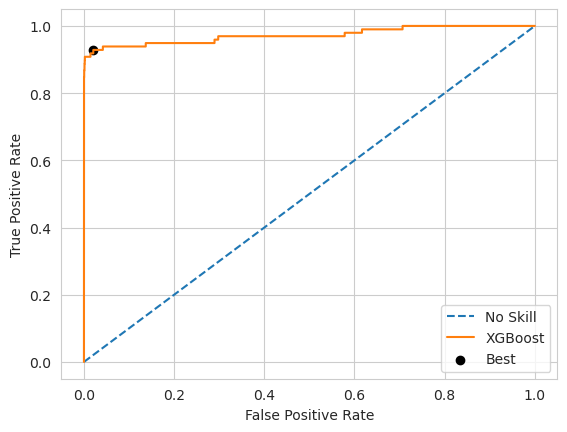

In [53]:
# predict probabilities
y_pred_prob = xgb_random.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred_prob = y_pred_prob[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [54]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create onfusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
AUC = round(metrics.roc_auc_score(y_test, y_class),4)


model_results = pd.DataFrame([['XGBoost',round(sensitivity,4), round(specificity,4),round(xgb_random.best_score_,4), AUC]],
               columns = ['Model','Sensitivity','Specificity','Train AUC Score', 'Test AUC Score'])
rand_oversamp = rand_oversamp.append(model_results, ignore_index = True)
rand_oversamp

[[55684  1180]
 [    8    90]]
Sensitivity: 	0.92
Specificity: 	0.98


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.908,0.977,0.987,0.943
1,Decision Tree,0.867,0.996,0.988,0.932
2,Random Forest,0.918,0.984,1.000,0.951
3,XGBoost,0.918,0.979,1.000,0.949


## 3) BALANCING TECHNIQUE 3 : ADASYN

In [55]:
#Applying Adasyn
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
print("Imbalance in Original y_train : ")
pd.crosstab( y_train, columns='count')

Imbalance in Original y_train : 


col_0,count
Class,
0,227451
1,394


In [56]:
print("y_train after ADASYN : ")
#Checking the class (percentage) distribution of the target after ADASYN
pd.crosstab( y_train_adasyn, columns='count')

y_train after ADASYN : 


col_0,count
Class,
0,227451
1,227458


In [57]:
#Creating empty DataFrame for holding models information
cols = ['Model Name','Sensitivity','Specificity',' Train AUC Score','Test AUC Score']
models_adasyn = pd.DataFrame(columns = cols)

## Logistic Regression

In [58]:
#Pipeline Processing for powertranformation and Logistic Regression
pipe = Pipeline([('pt',PowerTransformer()), ('logistic', LogisticRegression(random_state = 42))])

#HyperParameters Tuning
#choosing l2 penalty and only the following solvers works with l2 penalty
params = {'logistic__C':np.logspace(0,4,10),'logistic__penalty':['l2'],'logistic__solver':['newton-cg','saga','sag','liblinear']}

#Stratified Kfold
folds = StratifiedKFold(n_splits =5,shuffle = True, random_state = 42)

#Grid Search CV
model_log = RandomizedSearchCV(estimator = pipe,cv = folds, param_distributions = params, scoring = 'roc_auc',n_jobs=-1,verbose=1,random_state = 42 )
#fitting the model
model_log.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('logistic',
                                              LogisticRegression(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'logistic__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                                        'logistic__penalty': ['l2'],
                                        'logistic__solver': ['newton-cg',
                                                             'saga', 'sag',
                                                             'liblinear']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [59]:
# print best hyperparameters
print("Best AUC: ", model_log.best_score_)
print("Best hyperparameters: ", model_log.best_params_)

Best AUC:  0.9659439551957135
Best hyperparameters:  {'logistic__solver': 'liblinear', 'logistic__penalty': 'l2', 'logistic__C': 21.544346900318832}


Best Threshold=0.001564


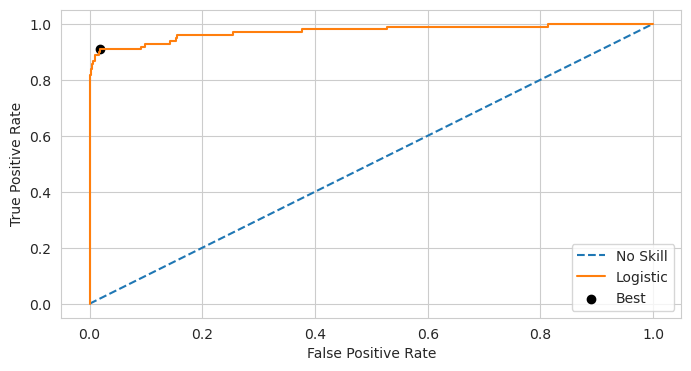

In [60]:
y_pred_prob = model_log.predict_proba(X_test)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [61]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[55792  1072]
 [   10    88]]
Sensitivity: 	0.9
Specificity: 	0.98
AUC:    	 0.94


In [62]:
models_adasyn.loc[-1] = ["Logistic Regression",round(sensitivity,4),round(specificity,4),round(model_log.best_score_,4),round(auc,4)]
models_adasyn.index = models_adasyn.index + 1  # shifting index
models_adasyn = models_adasyn.sort_index()  # sorting by index
models_adasyn

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.898,0.981,0.966,0.94


## Decision Trees

In [63]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [5,6],"dtree__min_samples_split": [72,74],
          "dtree__min_samples_leaf": [24,25]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create Randomizedsearch object
model_clf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)
model_clf.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('dtree',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': [5, 6],
                                        'dtree__min_samples_leaf': [24, 25],
                                        'dtree__min_samples_split': [72, 74]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [64]:
# print best hyperparameters
print("Best AUC: ", model_clf.best_score_)
print("Best hyperparameters: ", model_clf.best_params_)

Best AUC:  0.9780354680778972
Best hyperparameters:  {'dtree__min_samples_split': 74, 'dtree__min_samples_leaf': 24, 'dtree__max_depth': 6, 'dtree__criterion': 'entropy'}


In [65]:
y_pred_prob = model_clf.predict_proba(X_test)[:, 1]

Best Threshold=0.009880


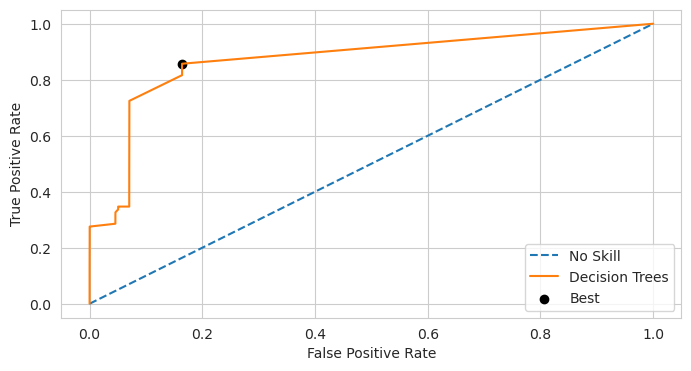

In [66]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Trees')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [67]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0, y_pred_prob))
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[47532  9332]
 [   18    80]]
Sensitivity: 	0.82
Specificity: 	0.84
AUC:    	 0.83


In [68]:
models_adasyn.loc[-1] = ["Decision Trees",round(sensitivity,4),round(specificity,4),round(model_clf.best_score_,4),round(auc,4)]
models_adasyn.index = models_adasyn.index + 1  # shifting index
models_adasyn = models_adasyn.sort_index()  # sorting by index
models_adasyn

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Decision Trees,0.816,0.836,0.978,0.826
1,Logistic Regression,0.898,0.981,0.966,0.940


## Random Forest

In [69]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('randomforest', RandomForestClassifier(random_state = 42))])

# hyperparameter space
params = [
{'randomforest__n_estimators': [100, 110], 'randomforest__min_samples_leaf': [8, 10], 
 'randomforest__criterion': ["gini", "entropy"]}
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create Randomizedsearch object
model_rf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)
# fit model
model_rf.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[04:21:16] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:26:22] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:31:29] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

[04:21:17] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:26:20] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:31:27] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[04:21:16] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:26:05] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:30:59] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "warm_start" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('randomforest',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions=[{'randomforest__criterion': ['gini',
                                                                     'entropy'],
                                         'randomforest__min_samples_leaf': [8,
                                                                            10],
                                         'randomforest__n_estimators': [100,
                                                                        110]}],
                   random_state=42, scoring='roc_auc', verbose=1)

In [70]:
# print best hyperparameters
print("Best AUC: ", model_rf.best_score_)
print("Best hyperparameters: ", model_rf.best_params_)

Best AUC:  0.9999956559421962
Best hyperparameters:  {'randomforest__n_estimators': 100, 'randomforest__min_samples_leaf': 8, 'randomforest__criterion': 'gini'}


Best Threshold=0.027312


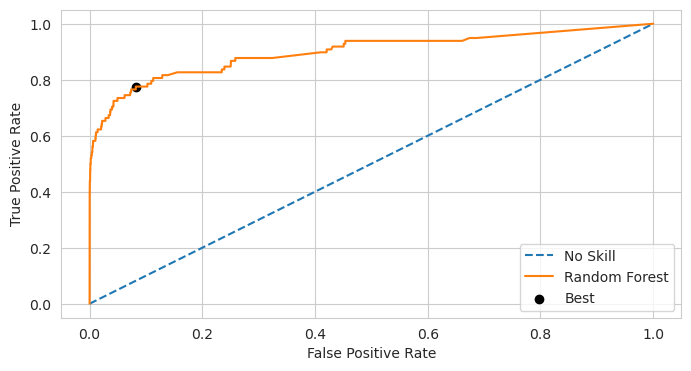

In [71]:
y_pred_prob = model_rf.predict_proba(X_test)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [72]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[52202  4662]
 [   23    75]]
Sensitivity: 	0.77
Specificity: 	0.92
AUC:    	 0.84


In [73]:
models_adasyn.loc[-1] = ["Random Forest",round(sensitivity,4),round(specificity,4),round(model_rf.best_score_,4),round(auc,4)]
models_adasyn.index = models_adasyn.index + 1  # shifting index
models_adasyn = models_adasyn.sort_index()  # sorting by index
models_adasyn

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Random Forest,0.765,0.918,1.000,0.842
1,Decision Trees,0.816,0.836,0.978,0.826
2,Logistic Regression,0.898,0.981,0.966,0.940


## XGBOOST

In [74]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('Xgb', XGBClassifier(objective = 'binary:logistic',n_estimators=120,random_state = 42))])

# hyperparameter space
# hyperparameter space
params = [
{"Xgb__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
 "Xgb__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "Xgb__min_child_weight" : [ 1, 3, 5, 7 ],
 "Xgb__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "Xgb__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create Randomizedsearch object
model_xgb = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)
# fit model
model_xgb.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('Xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            gam

In [75]:
# print best hyperparameters
print("Best AUC: ", model_xgb.best_score_)
print("Best hyperparameters: ", model_xgb.best_params_)

Best AUC:  0.9999908999543032
Best hyperparameters:  {'Xgb__min_child_weight': 1, 'Xgb__max_depth': 15, 'Xgb__learning_rate': 0.15, 'Xgb__gamma': 0.4, 'Xgb__colsample_bytree': 0.3}


Best Threshold=0.000087


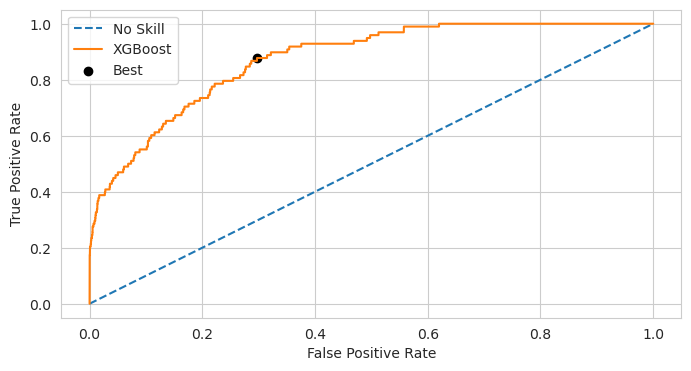

In [76]:
y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [77]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[39976 16888]
 [   13    85]]
Sensitivity: 	0.87
Specificity: 	0.7
AUC:    	 0.79


In [78]:
models_adasyn.loc[-1] = ["XgBoost",round(sensitivity,4),round(specificity,4),round(model_xgb.best_score_,4),round(auc,4)]
models_adasyn.index = models_adasyn.index + 1  # shifting index
models_adasyn = models_adasyn.sort_index()  # sorting by index
models_adasyn

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,XgBoost,0.867,0.703,1.000,0.785
1,Random Forest,0.765,0.918,1.000,0.842
2,Decision Trees,0.816,0.836,0.978,0.826
3,Logistic Regression,0.898,0.981,0.966,0.940


## 4) BALANCING TECHNIQUE 4 : SMOTE

In [79]:
sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print("Imbalance in Original y_train : ")
pd.crosstab( y_train, columns='count')

Imbalance in Original y_train : 


col_0,count
Class,
0,227451
1,394


In [80]:
print("y_train after SMOTE : ")
#Checking the class (percentage) distribution of the target after SMOTE
pd.crosstab( y_train_smote, columns='count')

y_train after SMOTE : 


col_0,count
Class,
0,227451
1,227451


In [81]:
#Creating empty DataFrame for holding models information
cols = ['Model Name','Sensitivity','Specificity',' Train AUC Score','Test AUC Score']
models_smote = pd.DataFrame(columns = cols)

## Logistic Regression

In [82]:
#Pipeline Processing for powertranformation and Logistic Regression
pipe = Pipeline([('pt',PowerTransformer()), ('logistic', LogisticRegression(random_state = 42))])

#HyperParameters Tuning
params = {'logistic__C':np.logspace(0,4,10),'logistic__penalty':['l1','l2']}

#Stratified Kfold
folds = StratifiedKFold(n_splits =5,shuffle = True, random_state = 42)

#Grid Search CV
model_log = RandomizedSearchCV(estimator = pipe,cv = folds, param_distributions = params, scoring = 'roc_auc',n_jobs=-1,verbose=1,random_state = 42 )
#fitting the model
model_log.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('logistic',
                                              LogisticRegression(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'logistic__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                                        'logistic__penalty': ['l1', 'l2']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [83]:
# print best hyperparameters
print("Best AUC: ", model_log.best_score_)
print("Best hyperparameters: ", model_log.best_params_)

Best AUC:  0.9904073765342798
Best hyperparameters:  {'logistic__penalty': 'l2', 'logistic__C': 166.81005372000593}


Best Threshold=0.001447


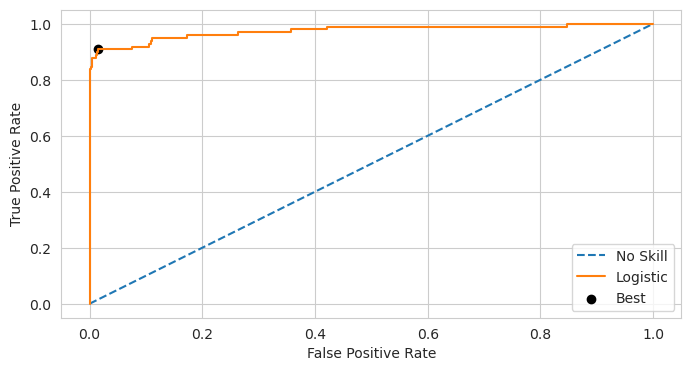

In [84]:
y_pred_prob = model_log.predict_proba(X_test)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [85]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[56047   817]
 [   10    88]]
Sensitivity: 	0.9
Specificity: 	0.99
AUC:    	 0.94


In [86]:
models_smote.loc[-1] = ["Logistic Regression",round(sensitivity,4),round(specificity,4),round(model_log.best_score_,4),round(auc,4)]
models_smote.index = models_smote.index + 1  # shifting index
models_smote = models_smote.sort_index()  # sorting by index
models_smote

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.898,0.986,0.99,0.942


## Decision Tree

In [87]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('dtree', DecisionTreeClassifier(random_state = 42))])

# hyperparameter space
params = {"dtree__criterion": ['gini', 'entropy'], "dtree__max_depth": [5,6],"dtree__min_samples_split": [72,74],
          "dtree__min_samples_leaf": [24,25]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
model_clf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)
model_clf.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('dtree',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': [5, 6],
                                        'dtree__min_samples_leaf': [24, 25],
                                        'dtree__min_samples_split': [72, 74]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [88]:
# print best hyperparameters
print("Best AUC: ", model_clf.best_score_)
print("Best hyperparameters: ", model_clf.best_params_)

Best AUC:  0.9946324317513273
Best hyperparameters:  {'dtree__min_samples_split': 74, 'dtree__min_samples_leaf': 24, 'dtree__max_depth': 6, 'dtree__criterion': 'entropy'}


Best Threshold=0.003445


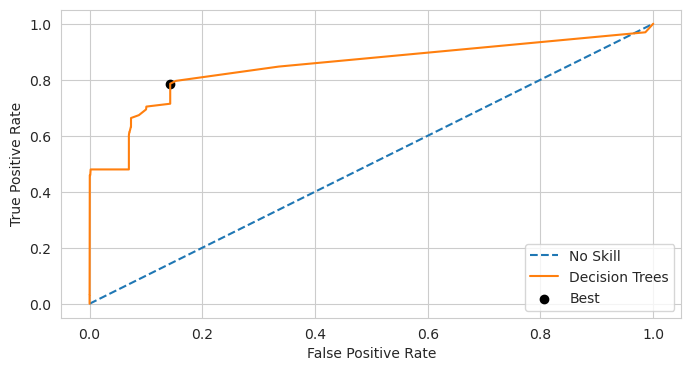

In [89]:
y_pred_prob = model_clf.predict_proba(X_test)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Decision Trees')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [90]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[48729  8135]
 [   28    70]]
Sensitivity: 	0.71
Specificity: 	0.86
AUC:    	 0.79


In [91]:
models_smote.loc[-1] = ["Decision Trees",round(sensitivity,4),round(specificity,4),round(model_clf.best_score_,4),round(auc,4)]
models_smote.index = models_smote.index + 1  # shifting index
models_smote = models_smote.sort_index()  # sorting by index
models_smote

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Decision Trees,0.714,0.857,0.995,0.786
1,Logistic Regression,0.898,0.986,0.990,0.942


## Random Forest

In [92]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('randomforest', RandomForestClassifier(warm_start = True,random_state = 42))])

# hyperparameter space
params = [
{'randomforest__n_estimators': [100, 110], 'randomforest__min_samples_leaf': [8, 10], 
 'randomforest__criterion': ["gini", "entropy"]}
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
model_rf = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)
# fit model
model_rf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('randomforest',
                                              RandomForestClassifier(random_state=42,
                                                                     warm_start=True))]),
                   n_jobs=-1,
                   param_distributions=[{'randomforest__criterion': ['gini',
                                                                     'entropy'],
                                         'randomforest__min_samples_leaf': [8,
                                                                            10],
                                         'randomforest__n_estimators': [100,
                                                                        110]}],
                   random_state=42, scoring='roc_auc', verbose=1)

In [93]:
# print best hyperparameters
print("Best AUC: ", model_rf.best_score_)
print("Best hyperparameters: ", model_rf.best_params_)

Best AUC:  0.9999943587745005
Best hyperparameters:  {'randomforest__n_estimators': 100, 'randomforest__min_samples_leaf': 10, 'randomforest__criterion': 'entropy'}


Best Threshold=0.025341


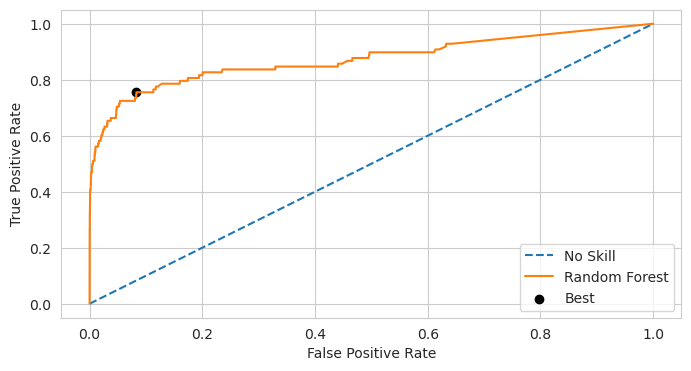

In [94]:
y_pred_prob = model_rf.predict_proba(X_test)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [95]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[52138  4726]
 [   25    73]]
Sensitivity: 	0.74
Specificity: 	0.92
AUC:    	 0.83


In [96]:
models_smote.loc[-1] = ["Random Forest",round(sensitivity,4),round(specificity,4),round(model_rf.best_score_,4),round(auc,4)]
models_smote.index = models_smote.index + 1  # shifting index
models_smote = models_smote.sort_index()  # sorting by index
models_smote

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Random Forest,0.745,0.917,1.000,0.831
1,Decision Trees,0.714,0.857,0.995,0.786
2,Logistic Regression,0.898,0.986,0.990,0.942


## XGBOOST

In [97]:
#Pipeline Processing for powertranformation and Decision Tree classifier
pipe = Pipeline([('pt',PowerTransformer()), ('Xgb', XGBClassifier(objective = 'binary:logistic',n_estimators=120,random_state = 42))])

# hyperparameter space
params = [
{"Xgb__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "Xgb__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "Xgb__min_child_weight" : [ 1, 3, 5, 7 ],
 "Xgb__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "Xgb__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
]

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

# create gridsearch object
model_xgb = RandomizedSearchCV(estimator=pipe, cv=folds, param_distributions=params, scoring='roc_auc', n_jobs=-1, verbose=1,random_state = 42)
# fit model
model_xgb.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('pt', PowerTransformer()),
                                             ('Xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            gam

In [98]:
# print best hyperparameters
print("Best AUC: ", model_xgb.best_score_)
print("Best hyperparameters: ", model_xgb.best_params_)

Best AUC:  0.9999917806167364
Best hyperparameters:  {'Xgb__min_child_weight': 1, 'Xgb__max_depth': 15, 'Xgb__learning_rate': 0.15, 'Xgb__gamma': 0.4, 'Xgb__colsample_bytree': 0.3}


Best Threshold=0.000104


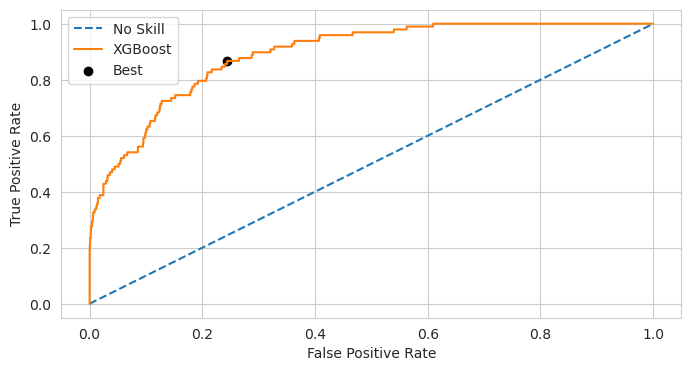

In [99]:
y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))
plt.figure(figsize = (8,4))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, label='XGBoost')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [100]:
y_class = list(map(lambda x: 1 if x > best_thresh else 0,y_pred_prob))
# create confusion matrix
cm = confusion_matrix(y_test, y_class)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_class, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
auc = round(roc_auc_score(y_test, y_class),4)
print("AUC:    \t", round(roc_auc_score(y_test, y_class),2))

[[42973 13891]
 [   14    84]]
Sensitivity: 	0.86
Specificity: 	0.76
AUC:    	 0.81


In [101]:
models_smote.loc[-1] = ["XgBoost",round(sensitivity,4),round(specificity,4),round(model_xgb.best_score_,4),round(auc,4)]
models_smote.index = models_smote.index + 1  # shifting index
models_smote = models_smote.sort_index()  # sorting by index
models_smote

,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,XgBoost,0.857,0.756,1.000,0.806
1,Random Forest,0.745,0.917,1.000,0.831
2,Decision Trees,0.714,0.857,0.995,0.786
3,Logistic Regression,0.898,0.986,0.990,0.942


In [102]:
# print("Results on Imbalanced Dataset:")
# imbalanced

In [103]:
print("Results on dataset balanced by random oversampling technique:")
rand_oversamp

Results on dataset balanced by random oversampling technique:


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.908,0.977,0.987,0.943
1,Decision Tree,0.867,0.996,0.988,0.932
2,Random Forest,0.918,0.984,1.000,0.951
3,XGBoost,0.918,0.979,1.000,0.949


In [104]:
print("Results on dataset balanced by uniform oversampling technique:")
uni_oversamp

Results on dataset balanced by uniform oversampling technique:


,Model,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,Logistic Regression,0.908,0.977,0.982,0.943
1,Decision Tree,0.837,0.997,0.924,0.917
2,Random Forest,0.908,0.994,0.971,0.951
3,XGBoost,0.908,0.993,0.981,0.950


In [105]:
print("Results on dataset balanced by ADASYN technique:")
models_adasyn

Results on dataset balanced by ADASYN technique:


,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,XgBoost,0.867,0.703,1.000,0.785
1,Random Forest,0.765,0.918,1.000,0.842
2,Decision Trees,0.816,0.836,0.978,0.826
3,Logistic Regression,0.898,0.981,0.966,0.940


In [106]:
print("Results on dataset balanced by SMOTE technique:")
models_smote

Results on dataset balanced by SMOTE technique:


,Model Name,Sensitivity,Specificity,Train AUC Score,Test AUC Score
0,XgBoost,0.857,0.756,1.000,0.806
1,Random Forest,0.745,0.917,1.000,0.831
2,Decision Trees,0.714,0.857,0.995,0.786
3,Logistic Regression,0.898,0.986,0.990,0.942
